In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import confusion_matrix
import matplotlib.mlab as mlab
%matplotlib inline

In [2]:
heart_df=pd.read_csv("observation1.csv")
heart_df.drop(['education'],axis=1,inplace=True)
heart_df.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [4]:
heart_df.rename(columns={'male':'Sex_male'},inplace=True)

        


In [14]:
observation_file=pd.read_csv('csv/out1.csv')
observation_file.head()


,Unnamed: 0,PATIENT,BODY HEIGHT,BODY WEIGHT,BMI,DIASTOLIC,SYSTOLIC,HEART RATE,RESPIRATORY,GLUSCOE,UREA,CREATININE,SMOKING,HAEMOGLOBIN,CHOLESTROL,DIASTOLIC
0,0,1d604da9-9a81-4ba9-80c2-de3375d59b40,['181.0'],['65.8'],['20.1'],NaN,['107.0'],['87.0'],['13.0'],[],[],[],['Never smoker'],[],[],['83.0']
1,1,1d604da9-9a81-4ba9-80c2-de3375d59b40,['181.0'],['70.9'],['21.7'],NaN,['110.0'],['96.0'],['13.0'],[],[],[],['Never smoker'],[],[],['75.0']
2,2,1d604da9-9a81-4ba9-80c2-de3375d59b40,['181.0'],['75.6'],['23.1'],NaN,['130.0'],['62.0'],['13.0'],[],[],[],['Never smoker'],[],[],['80.0']
3,3,1d604da9-9a81-4ba9-80c2-de3375d59b40,[],[],[],NaN,[],[],[],[],[],[],[],[],[],[]
4,4,1d604da9-9a81-4ba9-80c2-de3375d59b40,[],[],[],NaN,[],[],[],[],[],[],[],[],[],[]


In [56]:
IDS=observation_file['PATIENT'].unique()
PATIENT_REPORTS={}
for id in IDS:
    patient_data=observation_file[observation_file['PATIENT'] == id]
    PATIENT_REPORTS[id]=patient_data

In [ ]:
for id in IDS:
    data=(PATIENT_REPORTS[id])
    dates=data["DATE"].unique()
    for date in dates:
        D_day=data[data['DATE']==date]
        b_h=D_day[D_day['DESCRIPTION']=="Body Height"]
        b_h=b_h['VALUE']
        a=np.array(b_h)
        b_w=D_day[D_day['DESCRIPTION']=="Body Weight"]
        b_w=b_w['VALUE']
        b=np.array(b_w)
        bmi=D_day[D_day['DESCRIPTION']=="Body Mass Index"]
        bmi=bmi['VALUE']
        c=np.array(bmi)
        d_b_p=D_day[D_day['DESCRIPTION']=="Diastolic Blood Pressure"]
        d_b_p=d_b_p['VALUE']
        d=np.array(d_b_p)
        s_b_p=D_day[D_day['DESCRIPTION']=="Systolic Blood Pressure"]
        s_b_p=s_b_p['VALUE']
        e=np.array(s_b_p)
        h_r=D_day[D_day['DESCRIPTION']=="Heart rate"]
        h_r=h_r['VALUE']
        f=np.array(h_r)
        r=D_day[D_day['DESCRIPTION']=="Respiratory rate"]
        r=r['VALUE']
        r=round(r,2)
        g=np.array(r)
        gl=D_day[D_day['DESCRIPTION']=="Glucose"]
        gl=gl['VALUE']
        h=np.array(gl)
        u_n=D_day[D_day['DESCRIPTION']=="Urea Nitrogen"]
        u_n=u_n['VALUE']
        i=np.array(u_n)
        cr=D_day[D_day['DESCRIPTION']=="Creatinine"]
        cr=cr['VALUE']
        j=np.array(cr)
        smoke=D_day[D_day['DESCRIPTION']=="Tobacco smoking status NHIS"]
        smoke=smoke['VALUE']
        k=np.array(smoke)
        haemo=D_day[D_day['DESCRIPTION']=="Hemoglobin A1c/Hemoglobin.total in Blood"]
        haemo=haemo['VALUE']
        l=np.array(haemo)       
        chol=D_day[D_day['DESCRIPTION']=="Total Cholesterol"]
        chol=chol['VALUE']
        m=np.array(chol)   
        new_row={'PATIENT':id,'BODY HEIGHT':a,'BODY WEIGHT':b,'BMI':c,'DIASTOLIC':d,'SYSTOLIC':e,'HEART RATE':f,'RESPIRATORY':g,'GLUSCOE':h,'UREA':i,'CREATININE':j,'SMOKING':k,'HAEMOGLOBIN':l,'CHOLESTROL':m}
        new_frame =new_frame.append(new_row,ignore_index=True)

### <font color=CornflowerBlue>Missing values<font>

In [15]:
heart_df.isnull().sum()

Sex_male             0
age                  0
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [16]:
count=0
for i in heart_df.isnull().sum(axis=1):
    if i>0:
        count=count+1
print('Total number of rows with missing values is ', count)
print('since it is only',round((count/len(heart_df.index))*100), 'percent of the entire dataset the rows with missing values are excluded.')

Total number of rows with missing values is  489
since it is only 12 percent of the entire dataset the rows with missing values are excluded.


In [17]:
heart_df.dropna(axis=0,inplace=True)

## <font color=RoyalBlue>Exploratory Analysis<font>

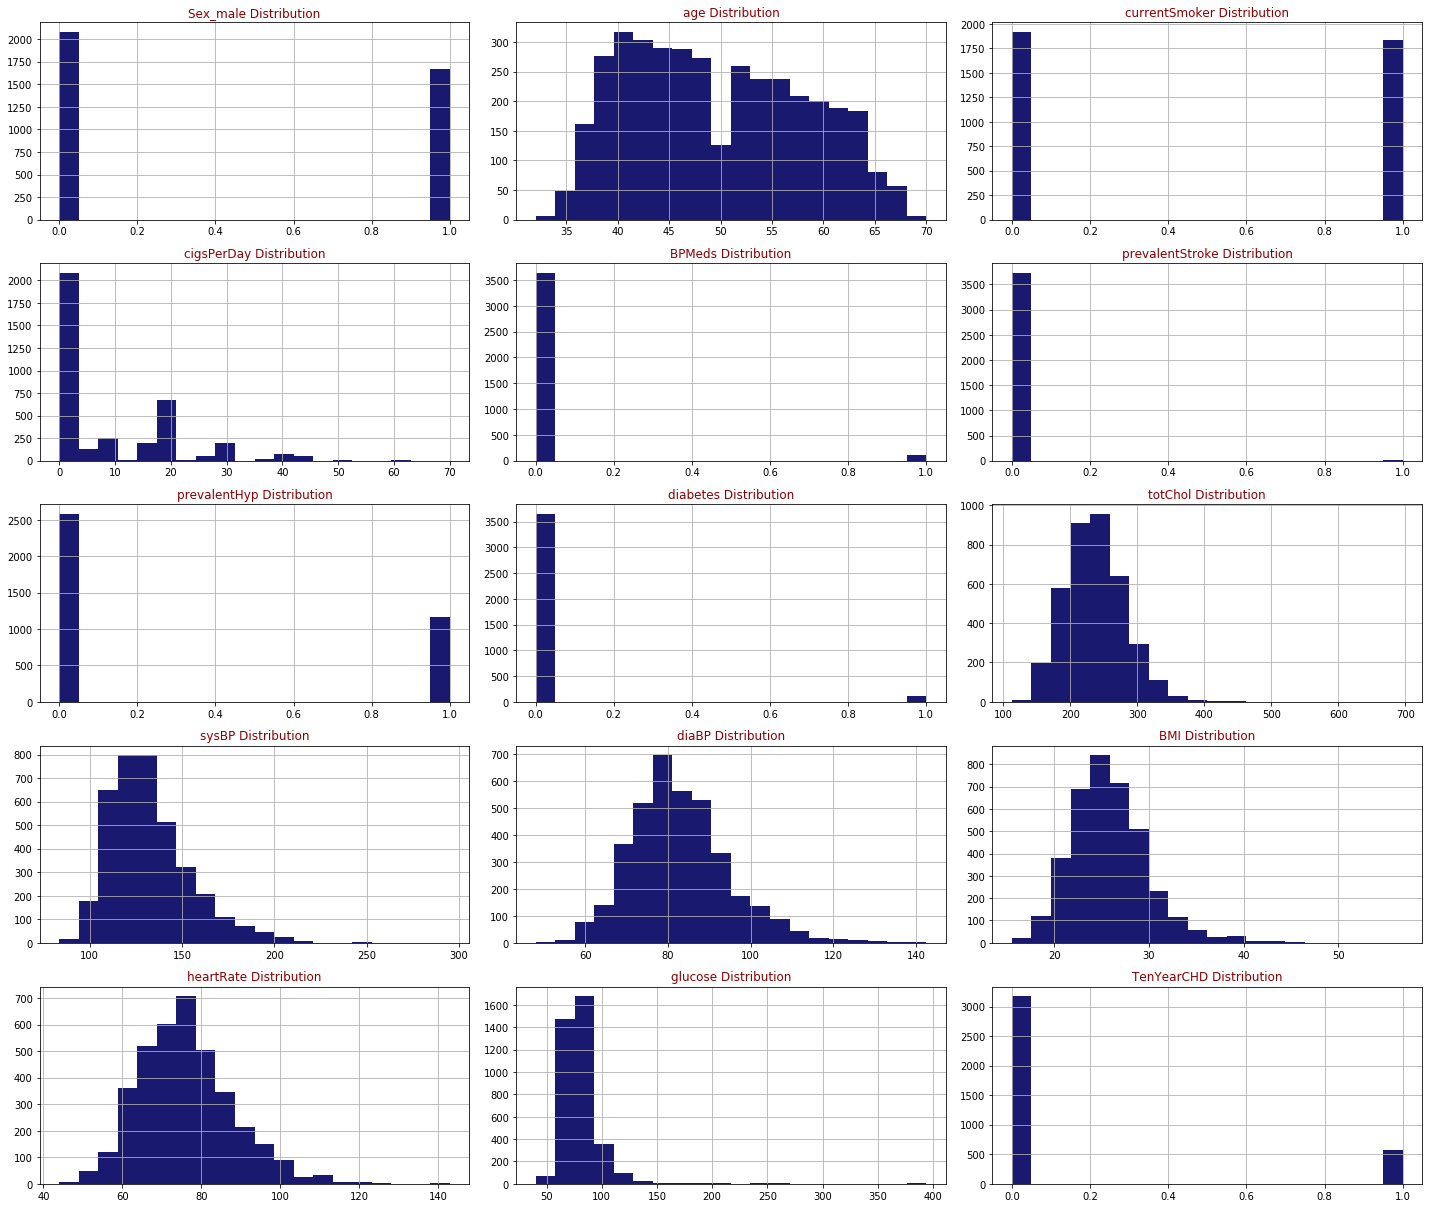

In [18]:
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='midnightblue')
        ax.set_title(feature+" Distribution",color='DarkRed')
        
    fig.tight_layout()  
    plt.show()
draw_histograms(heart_df,heart_df.columns,6,3)

In [19]:
heart_df.TenYearCHD.value_counts()

0    3179
1     572
Name: TenYearCHD, dtype: int64

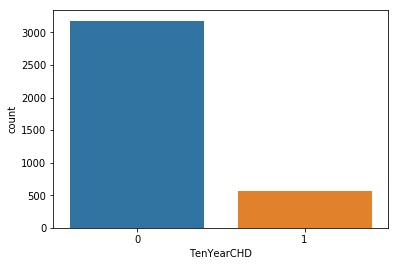

In [20]:
sn.countplot(x='TenYearCHD',data=heart_df)

There are 3179 patents with no heart disease and 572 patients with risk of heart disease.

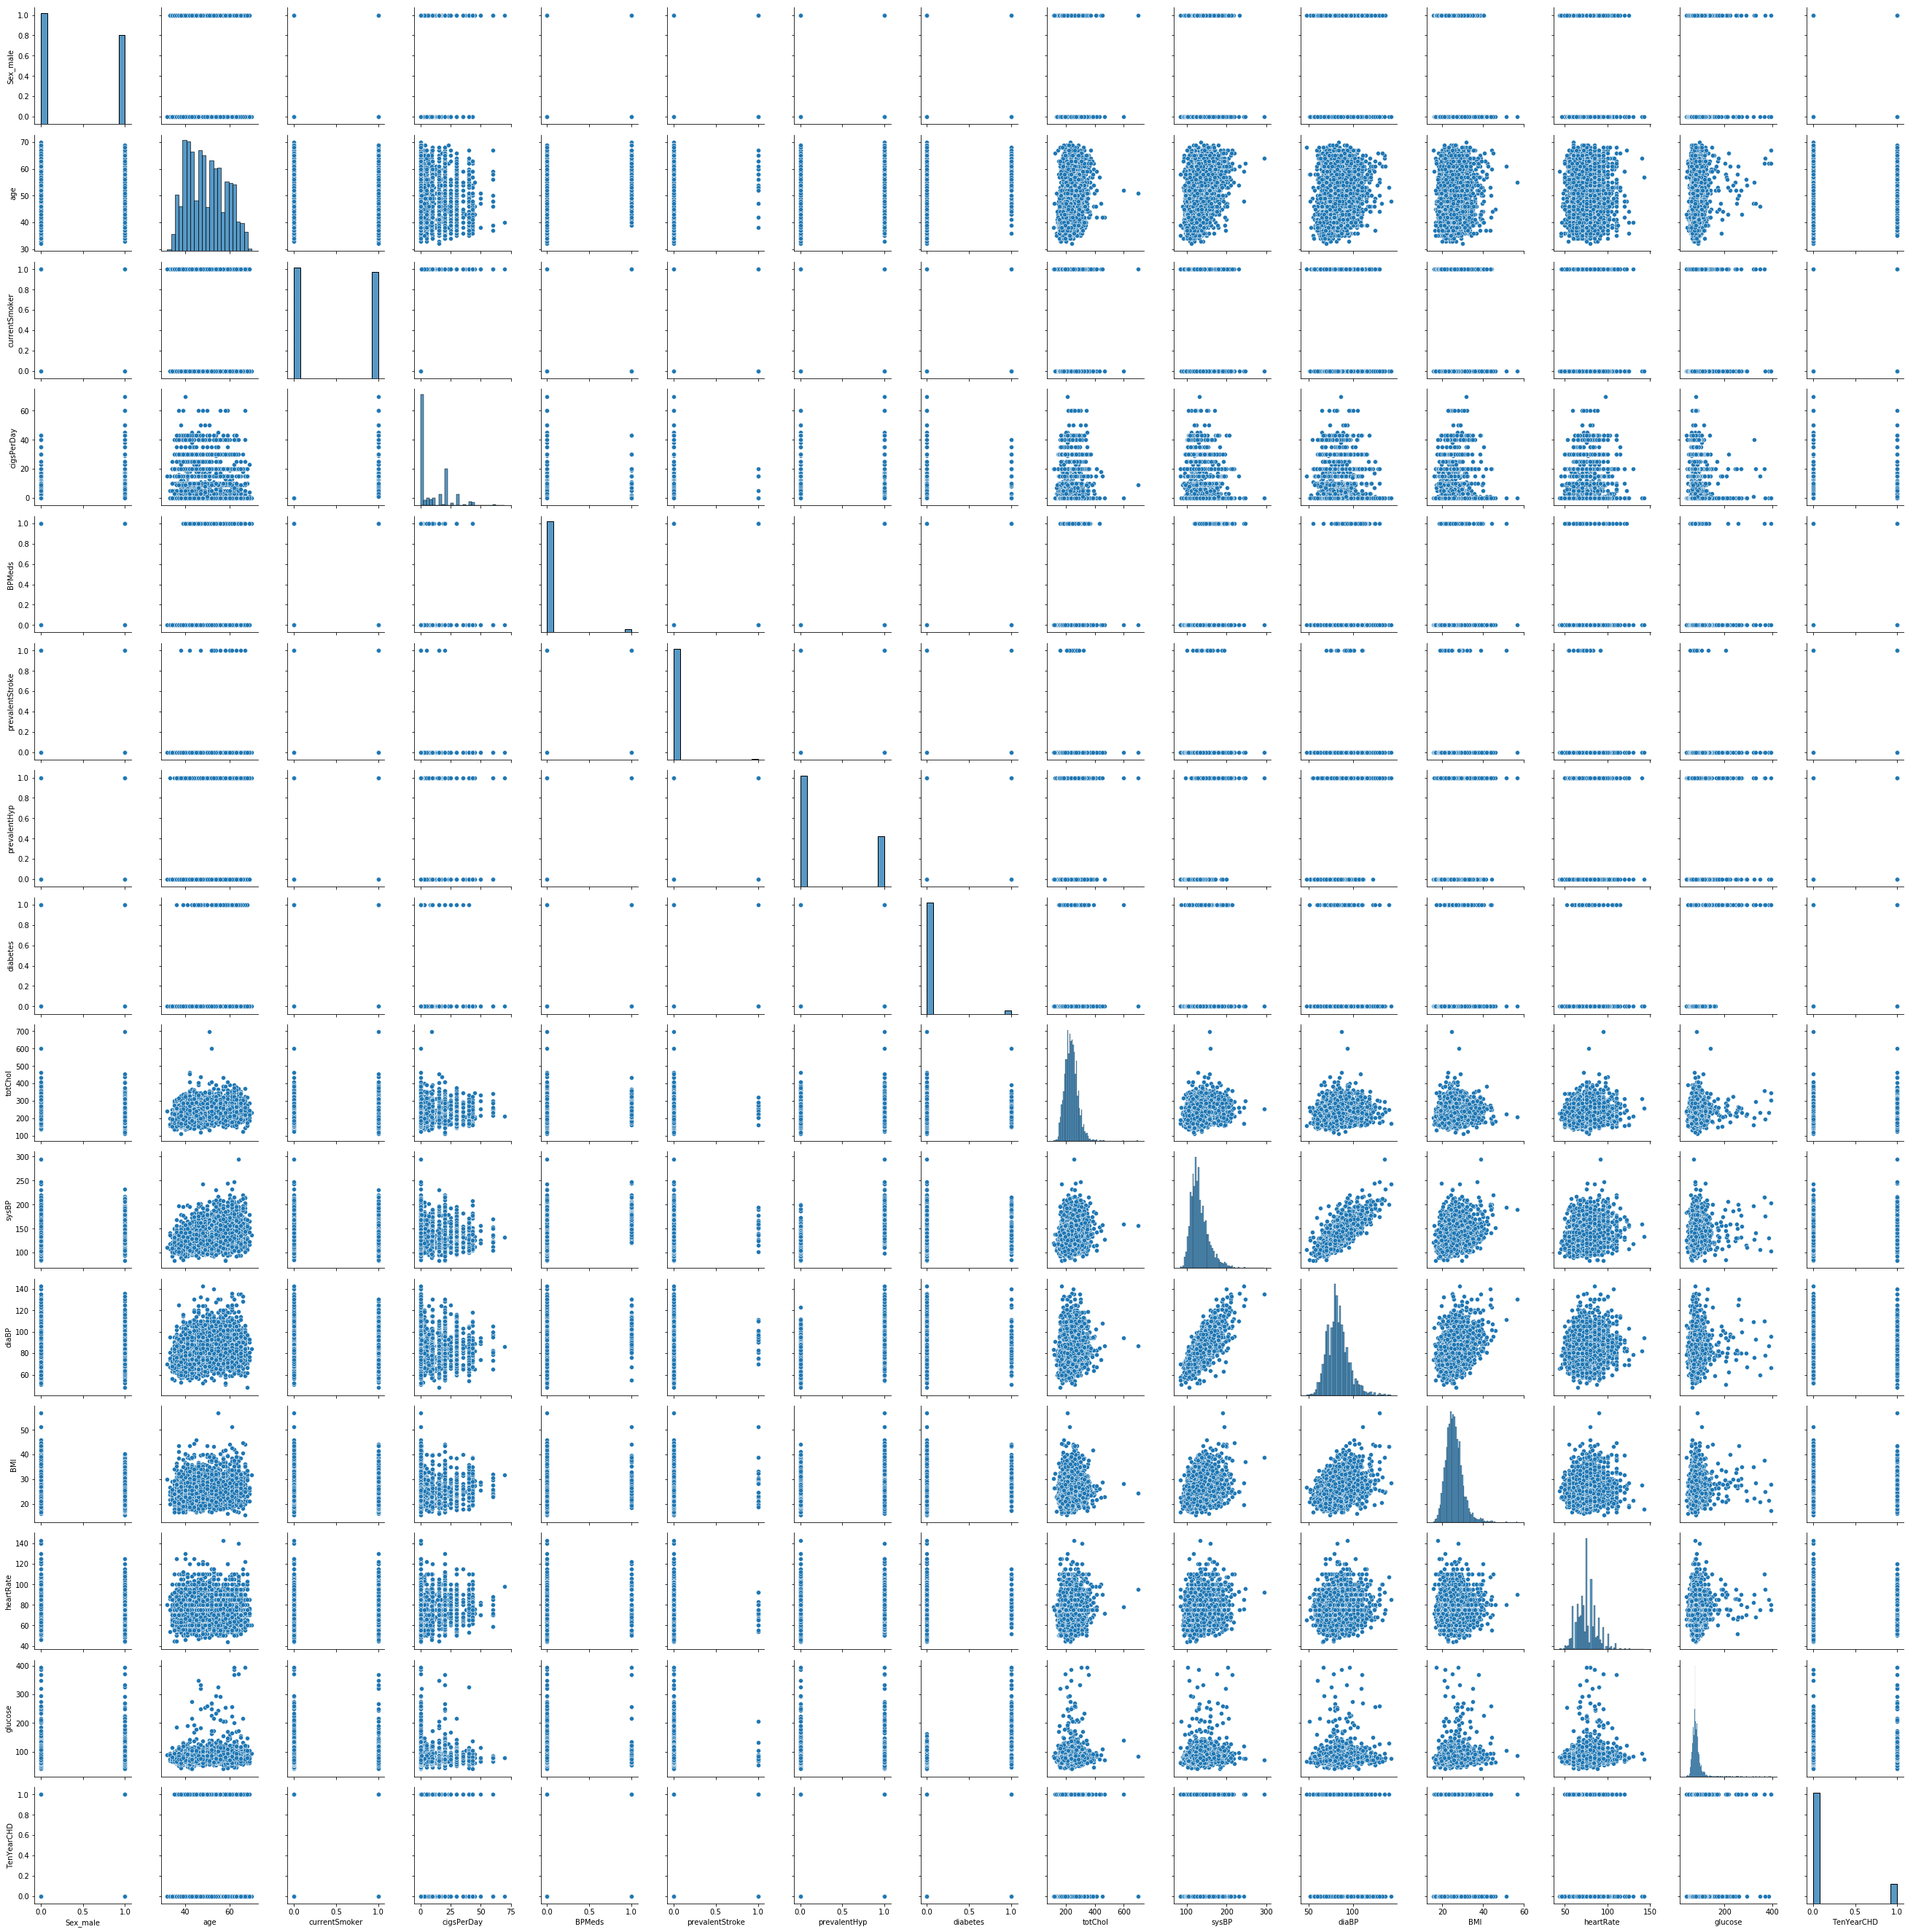

In [21]:
sn.pairplot(data=heart_df)

In [22]:
heart_df.describe()

,Sex_male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000
mean,0.445215,49.573447,0.488403,9.008531,0.030392,0.005599,0.311917,0.027193,236.928019,132.368435,82.938550,25.808288,75.704079,81.880032,0.152493
std,0.497056,8.570204,0.499932,11.925097,0.171686,0.074623,0.463338,0.162666,44.611594,22.046522,11.932779,4.065599,11.956382,23.882233,0.359546
min,0.000000,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,113.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.085000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.410000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.000000,90.000000,28.060000,82.000000,87.000000,0.000000
max,1.000000,70.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [23]:
from statsmodels.tools import add_constant as add_constant
heart_df_constant = add_constant(heart_df)
heart_df_constant.head()

C:\Users\admin\Anaconda3\envs\tensorflow_cpu\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,const,Sex_male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1.0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,1.0,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1.0,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,1.0,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,1.0,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [24]:
st.chisqprob = lambda chisq, df: st.chi2.sf(chisq, df)
cols=heart_df_constant.columns[:-1]
model=sm.Logit(heart_df.TenYearCHD,heart_df_constant[cols])
result=model.fit()
result.summary()


Optimization terminated successfully.
         Current function value: 0.377036
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 3751
Model:                          Logit   Df Residuals:                     3736
Method:                           MLE   Df Model:                           14
Date:                Mon, 23 Nov 2020   Pseudo R-squ.:                  0.1170
Time:                        20:40:12   Log-Likelihood:                -1414.3
converged:                       True   LL-Null:                       -1601.7
Covariance Type:            nonrobust   LLR p-value:                 2.439e-71
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -8.6532      0.687    -12.589      0.000     -10.000      -7.306
Sex_male            0.5742      0.107      5.345      0.000       0.364       0.785
age                 0.0641      0.007      9.799      0.000       0.051       0.077
currentSmoker       0.0739      0.155      0.478      0.633      -0.229       0.377
cigsPerDay          0.0184      0.006      3.000      0.003       0.006       0.030
BPMeds              0.1448      0.232      0.623      0.533      -0.310       0.600
prevalentStroke     0.7193      0.489      1.471      0.141      -0.239       1.678
prevalentHyp        0.2142      0.136      1.571      0.116      -0.053       0.481
diabetes            0.0022      0.312      0.007      0.994      -0.610       0.614
totChol             0.0023      0.001      2.081      0.037       0.000       0.004
sysBP               0.0154      0.004      4.082      0.000       0.008       0.023
diaBP              -0.0040      0.006     -0.623      0.533      -0.016       0.009
BMI                 0.0103      0.013      0.827      0.408      -0.014       0.035
heartRate          -0.0023      0.004     -0.549      0.583      -0.010       0.006
glucose             0.0076      0.002      3.409      0.001       0.003       0.012
===================================================================================
"""

In [43]:
def back_feature_elem (data_frame,dep_var,col_list):
    """ Takes in the dataframe, the dependent variable and a list of column names, runs the regression repeatedly eleminating feature with the highest
    P-value above alpha one at a time and returns the regression summary with all p-values below alpha"""

    while len(col_list)>0 :
        model=sm.Logit(dep_var,data_frame[col_list])
        result=model.fit(disp=0)
        largest_pvalue=round(result.pvalues,3).nlargest(1)
        if largest_pvalue[0]<(0.05):
            return result
            break
        else:
            col_list=col_list.drop(largest_pvalue.index)

result=back_feature_elem(heart_df_constant,heart_df.TenYearCHD,cols)

In [44]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 3751
Model:                          Logit   Df Residuals:                     3744
Method:                           MLE   Df Model:                            6
Date:                Mon, 23 Nov 2020   Pseudo R-squ.:                  0.1149
Time:                        20:44:04   Log-Likelihood:                -1417.7
converged:                       True   LL-Null:                       -1601.7
Covariance Type:            nonrobust   LLR p-value:                 2.127e-76
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -9.1264      0.468    -19.504      0.000     -10.043      -8.209
Sex_male       0.5815      0.105      5.524      0.000       0.375       0.788
age            0.0655      0.006     10.343      0.000       0.053       0.078
cigsPerDay     0.0197      0.004      4.805      0.000       0.012       0.028
totChol        0.0023      0.001      2.106      0.035       0.000       0.004
sysBP          0.0174      0.002      8.162      0.000       0.013       0.022
glucose        0.0076      0.002      4.574      0.000       0.004       0.011
==============================================================================
"""

## <font color=RoyalBlue>Interpreting the results: Odds Ratio, Confidence Intervals and Pvalues<font>

In [45]:
params = np.exp(result.params)
conf = np.exp(result.conf_int())
conf['OR'] = params
pvalue=round(result.pvalues,3)
conf['pvalue']=pvalue
conf.columns = ['CI 95%(2.5%)', 'CI 95%(97.5%)', 'Odds Ratio','pvalue']
print ((conf))


            CI 95%(2.5%)  CI 95%(97.5%)  Odds Ratio  pvalue
const           0.000043       0.000272    0.000109   0.000
Sex_male        1.455242       2.198536    1.788687   0.000
age             1.054483       1.080969    1.067644   0.000
cigsPerDay      1.011733       1.028128    1.019897   0.000
totChol         1.000158       1.004394    1.002273   0.035
sysBP           1.013292       1.021784    1.017529   0.000
glucose         1.004346       1.010898    1.007617   0.000


### <font color=CornflowerBlue>Splitting data to train and test split<font>

In [46]:
import sklearn
new_features=heart_df[['age','Sex_male','cigsPerDay','totChol','sysBP','glucose','TenYearCHD']]
x=new_features.iloc[:,:-1]
y=new_features.iloc[:,-1]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=5)

In [47]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(x_train,y_train)
y_pred=logreg.predict(x_test)

C:\Users\admin\Anaconda3\envs\tensorflow_cpu\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


## <font color=RoyalBlue>Model Evaluation<font>

### <font color=CornflowerBlue>Model accuracy<font>

In [48]:
sklearn.metrics.accuracy_score(y_test,y_pred)

0.881491344873502

####  <font color=DarkBlue>Accuracy of the model is 0.88<font>

### <font color=CornflowerBlue>Confusion matrix<font>

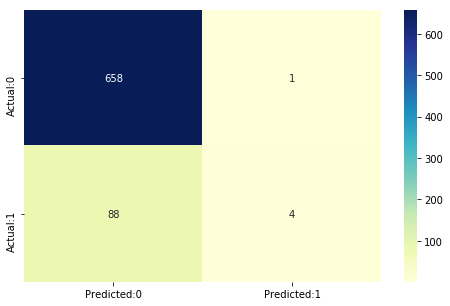

In [49]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sn.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

The confusion matrix shows 658+4 = 662 correct predictions and 88+1= 89 incorrect ones.

**<font color=DarkBlue>True Positives:**  4<font>

**<font color=DarkBlue>True Negatives:**  658<font>

**<font color=DarkBlue>False Positives:** 1 (*Type I error*)<font>

**<font color=DarkBlue>False Negatives:** 88 ( *Type II error*)<font>

In [50]:
TN=cm[0,0]
TP=cm[1,1]
FN=cm[1,0]
FP=cm[0,1]
sensitivity=TP/float(TP+FN)
specificity=TN/float(TN+FP)

### <font color=CornflowerBlue>Model Evaluation - Statistics<font>

In [51]:
print('The acuuracy of the model = TP+TN/(TP+TN+FP+FN) = ',(TP+TN)/float(TP+TN+FP+FN),'\n',

'The Missclassification = 1-Accuracy = ',1-((TP+TN)/float(TP+TN+FP+FN)),'\n',

'Sensitivity or True Positive Rate = TP/(TP+FN) = ',TP/float(TP+FN),'\n',

'Specificity or True Negative Rate = TN/(TN+FP) = ',TN/float(TN+FP),'\n',

'Positive Predictive value = TP/(TP+FP) = ',TP/float(TP+FP),'\n',

'Negative predictive Value = TN/(TN+FN) = ',TN/float(TN+FN),'\n',

'Positive Likelihood Ratio = Sensitivity/(1-Specificity) = ',sensitivity/(1-specificity),'\n',

'Negative likelihood Ratio = (1-Sensitivity)/Specificity = ',(1-sensitivity)/specificity)


The acuuracy of the model = TP+TN/(TP+TN+FP+FN) =  0.881491344873502 
 The Missclassification = 1-Accuracy =  0.118508655126498 
 Sensitivity or True Positive Rate = TP/(TP+FN) =  0.043478260869565216 
 Specificity or True Negative Rate = TN/(TN+FP) =  0.9984825493171472 
 Positive Predictive value = TP/(TP+FP) =  0.8 
 Negative predictive Value = TN/(TN+FN) =  0.8820375335120644 
 Positive Likelihood Ratio = Sensitivity/(1-Specificity) =  28.65217391304351 
 Negative likelihood Ratio = (1-Sensitivity)/Specificity =  0.9579754195850403


**From the above statistics it is clear that the model is highly specific than sensitive. The negative values are predicted more accurately than the positives.**

In [52]:
y_pred_prob=logreg.predict_proba(x_test)[:,:]
y_pred_prob_df=pd.DataFrame(data=y_pred_prob, columns=['Safe','Risk'])
y_pred_prob_df.head()

,Safe,Risk
0,0.859992,0.140008
1,0.930992,0.069008
2,0.792031,0.207969
3,0.814826,0.185174
4,0.875304,0.124696


In [53]:
from sklearn.preprocessing import binarize
for i in range(1,5):
    cm2=0
    y_pred_prob_yes=logreg.predict_proba(x_test)
    y_pred2=binarize(y_pred_prob_yes,i/10)[:,1]
    cm2=confusion_matrix(y_test,y_pred2)
    print ('With',i/10,'threshold the Confusion Matrix is ','\n',cm2,'\n',
            'with',cm2[0,0]+cm2[1,1],'correct predictions and',cm2[1,0],'Type II errors( False Negatives)','\n\n',
          'Sensitivity: ',cm2[1,1]/(float(cm2[1,1]+cm2[1,0])),'Specificity: ',cm2[0,0]/(float(cm2[0,0]+cm2[0,1])),'\n\n\n')
    

With 0.1 threshold the Confusion Matrix is  
 [[240 419]
 [ 11  81]] 
 with 321 correct predictions and 11 Type II errors( False Negatives) 

 Sensitivity:  0.8804347826086957 Specificity:  0.36418816388467373 



With 0.2 threshold the Confusion Matrix is  
 [[519 140]
 [ 43  49]] 
 with 568 correct predictions and 43 Type II errors( False Negatives) 

 Sensitivity:  0.532608695652174 Specificity:  0.787556904400607 



With 0.3 threshold the Confusion Matrix is  
 [[617  42]
 [ 70  22]] 
 with 639 correct predictions and 70 Type II errors( False Negatives) 

 Sensitivity:  0.2391304347826087 Specificity:  0.936267071320182 



With 0.4 threshold the Confusion Matrix is  
 [[652   7]
 [ 86   6]] 
 with 658 correct predictions and 86 Type II errors( False Negatives) 

 Sensitivity:  0.06521739130434782 Specificity:  0.9893778452200304 





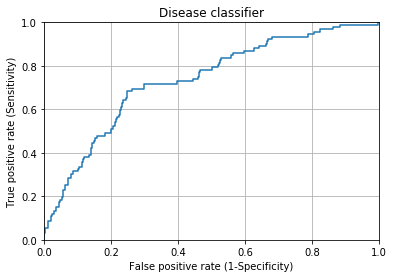

In [59]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_yes[:,1])
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('Disease classifier')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.grid(True)